In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mp
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)

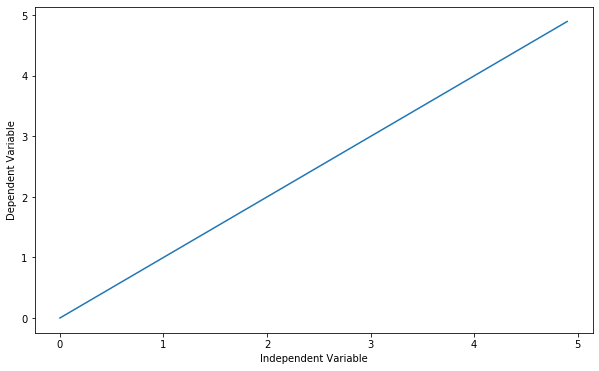

In [35]:
X = np.arange(0.0, 5.0, 0.1)
a=1.0
b=0.0
Y=a*X + b
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [36]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [37]:
a = tf.Variable(1.0)
b = tf.Variable(2.0)
y = a*x_data + b

In [38]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [39]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [40]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

0 [1.6610119, 3.017364]
5 [1.8926932, 2.591814]
10 [2.1625721, 2.4459267]
15 [2.366067, 2.3355472]
20 [2.519626, 2.2522547]
25 [2.6355028, 2.1894014]
30 [2.7229445, 2.1419718]
35 [2.7889285, 2.106181]
40 [2.8387208, 2.079173]
45 [2.876294, 2.0587926]
50 [2.9046474, 2.0434134]
55 [2.9260428, 2.0318081]
60 [2.9421883, 2.0230508]
65 [2.9543717, 2.0164423]
70 [2.9635653, 2.0114555]
75 [2.9705029, 2.0076923]
80 [2.975738, 2.0048528]
85 [2.979689, 2.0027099]
90 [2.9826698, 2.001093]
95 [2.9849193, 1.9998728]


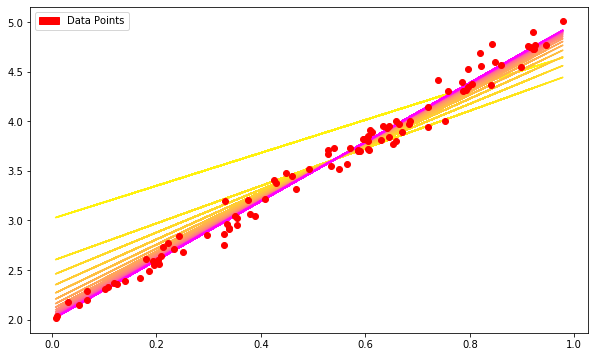

In [41]:
train_data= []
for step in range(100):
    evals = sess.run([train, a, b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 /len(train_data)
    cg -= 1.0/len(train_data)
    if cb > 1.0:
        cb = 1.0
    if cg < 0.0:
        cg = 0.0
    [a,b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))
plt.plot(x_data, y_data, 'ro')
green_line = mp.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()

In [42]:
sess.close()